In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import io
import yfinance as yf

In [ ]:
BTC = yf.download("BTC-USD", start = "2014-04-17", end = "2022-07-27")

[*********************100%***********************]  1 of 1 completed


In [ ]:
BTC = BTC.reset_index()

In [ ]:
Tweet_Volume = pd.read_csv('/content/Tweets_Volume.csv')
Tweet_Volume.head()

,Date,Tweets
0,17-04-2014,15215.0
1,18-04-2014,14028.0
2,19-04-2014,12337.0
3,20-04-2014,12139.0
4,21-04-2014,14244.0


In [ ]:
Tweet_Volume['Date'] = pd.to_datetime(Tweet_Volume['Date'])

In [ ]:
BTC_Tweets_Prices = BTC.merge(Tweet_Volume, on='Date', how='outer')
BTC_Tweets_Prices

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,27946.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,21135.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,20775.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,17607.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,17026.0
...,...,...,...,...,...,...,...,...
3066,2022-08-07,NaN,NaN,NaN,NaN,NaN,NaN,120842.0
3067,2022-09-07,NaN,NaN,NaN,NaN,NaN,NaN,107656.0
3068,2022-10-07,NaN,NaN,NaN,NaN,NaN,NaN,104166.0
3069,2022-11-07,NaN,NaN,NaN,NaN,NaN,NaN,119029.0


In [ ]:
Google_Trends = pd.read_csv('/content/Googledata.csv')
Google_Trends.head()

,Date,Google Trends
0,17/04/14,65
1,18/04/14,60
2,19/04/14,56
3,20/04/14,52
4,21/04/14,58


In [ ]:
Google_Trends['Date'] = pd.to_datetime(Google_Trends['Date'])

In [ ]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Prices.merge(Google_Trends, on='Date', how='outer')
BTC_Tweets_Trends_Prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets,Google Trends
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,27946.0,47.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,21135.0,47.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,20775.0,53.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,17607.0,46.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,17026.0,48.0


## Only Retaining Bitcoin Price and Tweets per day Features

In [ ]:
BTC_Tweets_Trends_Prices_with_Dates = BTC_Tweets_Trends_Prices.drop(['Open', 'High', 'Low','Close','Volume'], axis = 1)
BTC_Tweets_Trends_Prices_with_Dates = BTC_Tweets_Trends_Prices.dropna(axis = 0)
BTC_Tweets_Trends_Prices_with_Dates.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets,Google Trends
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,27946.0,47.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,21135.0,47.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,20775.0,53.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,17607.0,46.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,17026.0,48.0


In [ ]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Trends_Prices.drop(['Open', 'High', 'Low','Close','Volume','Date'], axis = 1)

In [ ]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Trends_Prices.dropna(axis = 0)

In [ ]:
BTC_Tweets_Trends_Prices

,Adj Close,Tweets,Google Trends
0,457.334015,27946.0,47.0
1,424.440002,21135.0,47.0
2,394.795990,20775.0,53.0
3,408.903992,17607.0,46.0
4,398.821014,17026.0,48.0
...,...,...,...
2867,22465.478516,121141.0,30.0
2868,22609.164062,96410.0,27.0
2869,21361.701172,111431.0,33.0
2870,21239.753906,116187.0,34.0


### Changing Column Order to bring Target variable to Right position

In [ ]:
cols = BTC_Tweets_Trends_Prices.columns.tolist()
cols

['Adj Close', 'Tweets', 'Google Trends']

In [ ]:
cols = ['Tweets', 'Google Trends','Adj Close']
cols

['Tweets', 'Google Trends', 'Adj Close']

In [ ]:
BTC_Tweets_Trends_Prices = BTC_Tweets_Trends_Prices[cols]
BTC_Tweets_Trends_Prices

,Tweets,Google Trends,Adj Close
0,27946.0,47.0,457.334015
1,21135.0,47.0,424.440002
2,20775.0,53.0,394.795990
3,17607.0,46.0,408.903992
4,17026.0,48.0,398.821014
...,...,...,...
2867,121141.0,30.0,22465.478516
2868,96410.0,27.0,22609.164062
2869,111431.0,33.0,21361.701172
2870,116187.0,34.0,21239.753906


# Feature Scaling Data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
BTC_Tweets_Trends_Prices_1 = scaler.fit_transform(BTC_Tweets_Trends_Prices)

In [ ]:
BTC_Tweets_Trends_Prices_1

array([[0.05795108, 0.44210526, 0.00414359],
       [0.03883334, 0.44210526, 0.00365546],
       [0.03782286, 0.50526316, 0.00321557],
       ...,
       [0.29228442, 0.29473684, 0.31434929],
       [0.30563399, 0.30526316, 0.31253968],
       [0.17669101, 0.28421053, 0.33762986]])

In [ ]:
np.random.seed(0)

In [ ]:
BTC_Tweets_Trends_Prices_1 = pd.DataFrame(BTC_Tweets_Trends_Prices_1)

In [ ]:
BTC_Tweets_Trends_Prices_1

,0,1,2
0,0.057951,0.442105,0.004144
1,0.038833,0.442105,0.003655
2,0.037823,0.505263,0.003216
3,0.028931,0.431579,0.003425
4,0.027300,0.452632,0.003275
...,...,...,...
2763,0.319539,0.263158,0.330729
2764,0.250122,0.231579,0.332861
2765,0.292284,0.294737,0.314349
2766,0.305634,0.305263,0.312540


## Train Test Splitting the Data

In [ ]:
X = BTC_Tweets_Trends_Prices_1.iloc[:,:-1].values 
Y = BTC_Tweets_Trends_Prices_1.iloc[:,-1].values

In [ ]:
X

array([[0.05795108, 0.44210526],
       [0.03883334, 0.44210526],
       [0.03782286, 0.50526316],
       ...,
       [0.29228442, 0.29473684],
       [0.30563399, 0.30526316],
       [0.17669101, 0.28421053]])

In [ ]:
Y

array([0.00414359, 0.00365546, 0.00321557, ..., 0.31434929, 0.31253968,
       0.33762986])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.svm import NuSVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [ ]:
nsvr = NuSVR()
print(nsvr)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

NuSVR()


NuSVR()

In [ ]:
def MAPE(y_true, Ypred): 
    y_true, Ypred = np.array(y_true), np.array(Ypred)
    return np.mean(np.abs((y_true - Ypred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [ ]:
nsvr.fit(X_train, Y_train)

score = nsvr.score(X_train, Y_train)
print("R-squared:", score)
print("Accuracy: %.2f%%" % (score*100.0))

R-squared: 0.7492731891856467
Accuracy: 74.93%


In [ ]:
Ypred = nsvr.predict(X_test)

mse = mean_squared_error(Y_test, Ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAPE :", MAPE(Y_test,Ypred))

MSE:  0.01278604470848167
RMSE:  0.006393022354240835
MAPE : 7.957230176908841


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


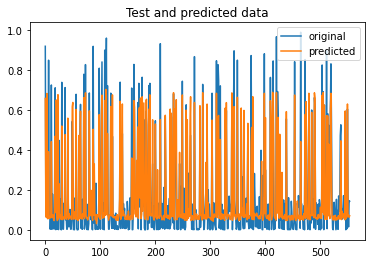

In [ ]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, Ypred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()